In [48]:
# SVM Classification
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
import pandas as pd
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

In [4]:
df_Train = pd.read_csv('SalaryData_Train(1).csv')

In [5]:
df_Train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
df_Test= pd.read_csv('SalaryData_Test(1).csv.crdownload')

In [7]:
df_Test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [8]:
df_Train.info()
df_Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5410 entries, 0 to 5409
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---

In [9]:
df_Train.describe()


,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [10]:
df_Test.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000
mean,38.552126,10.100370,1199.125878,92.203697,40.975970
std,13.310656,2.578998,8147.201770,413.944165,12.085179
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3175.000000,99.000000


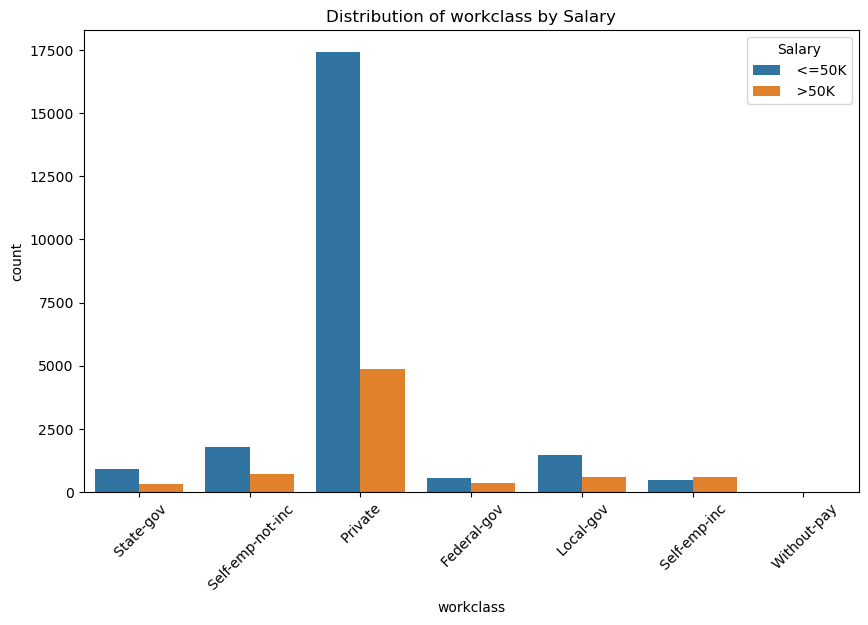

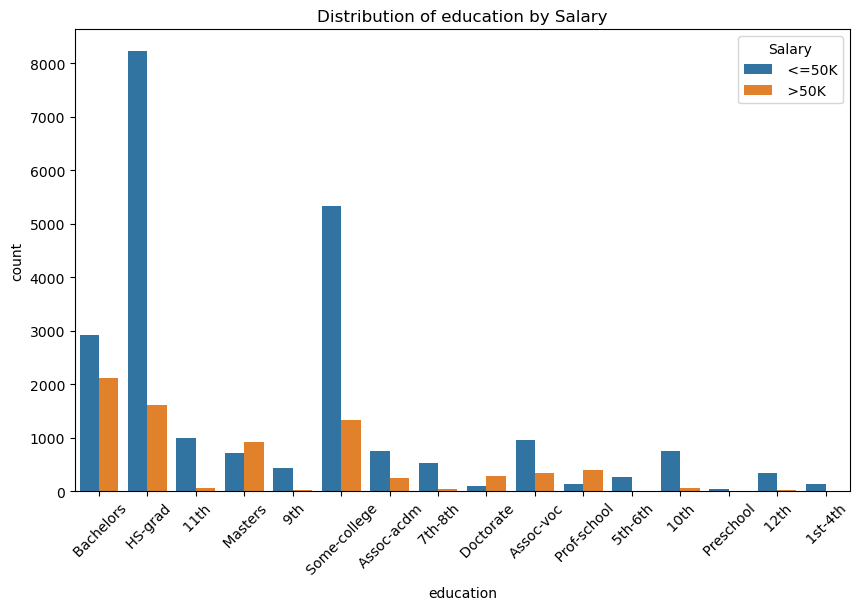

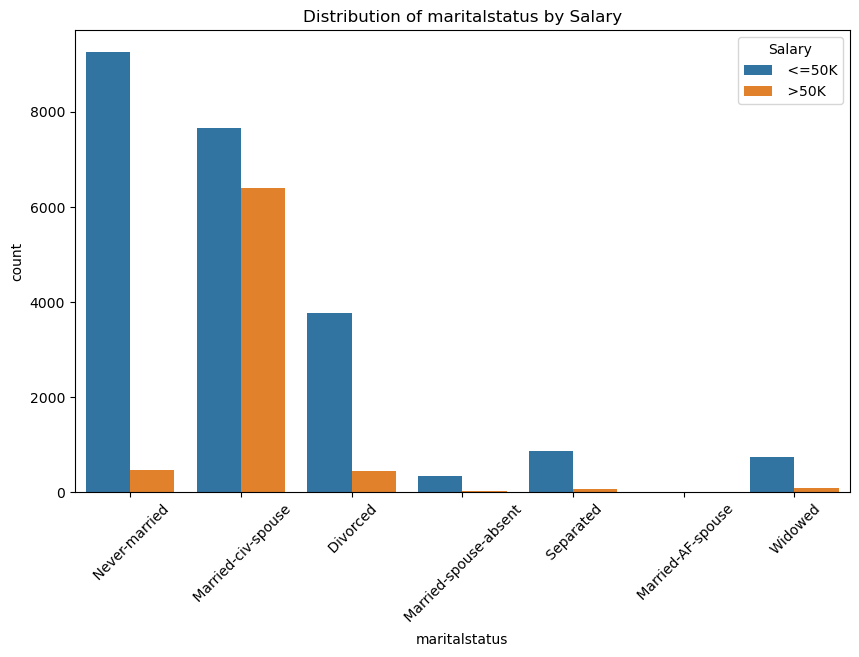

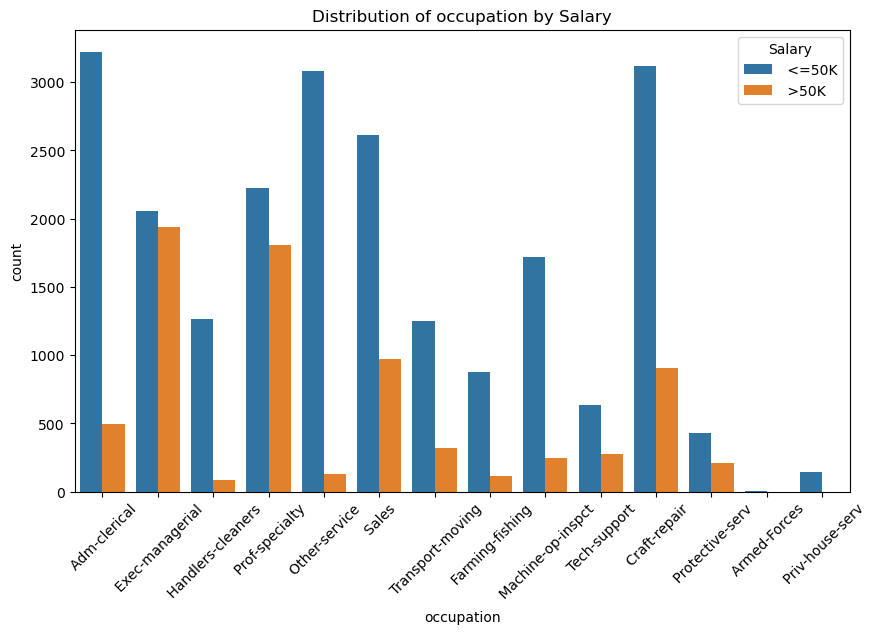

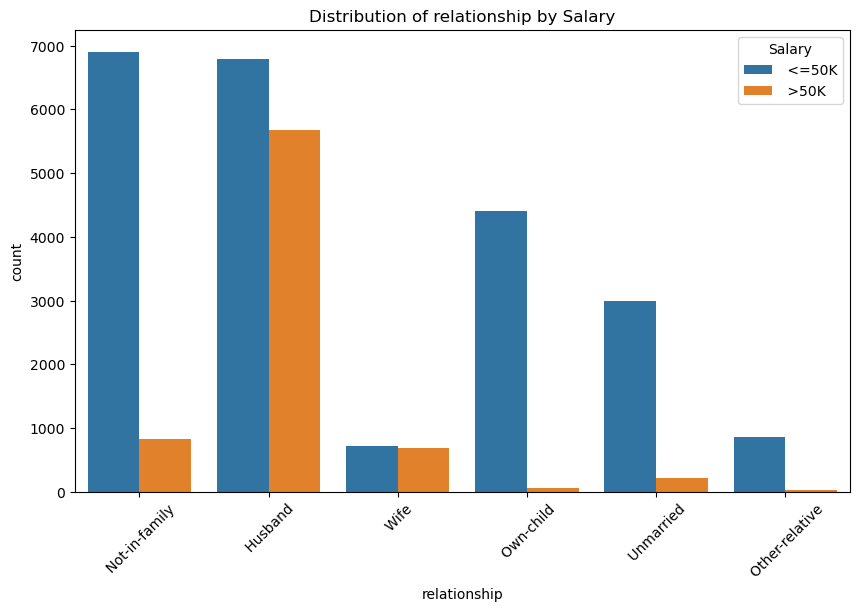

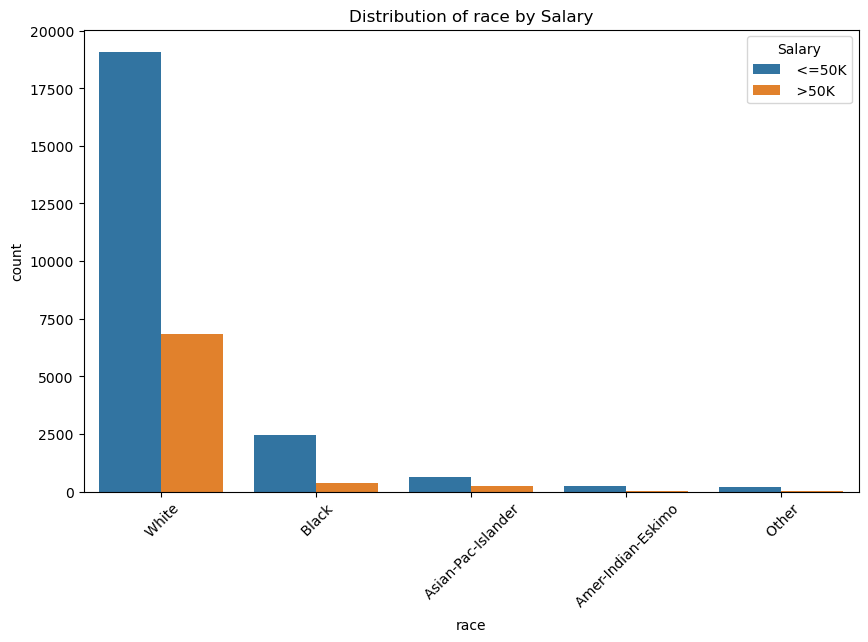

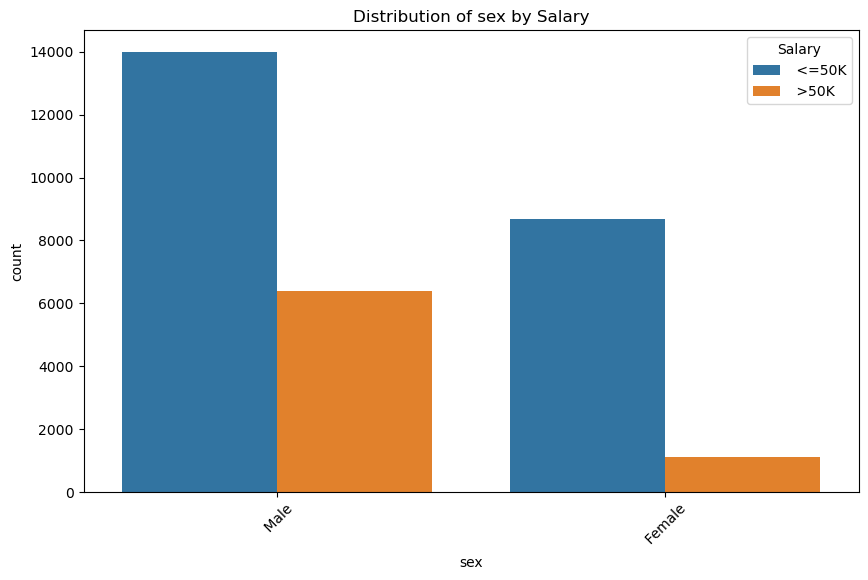

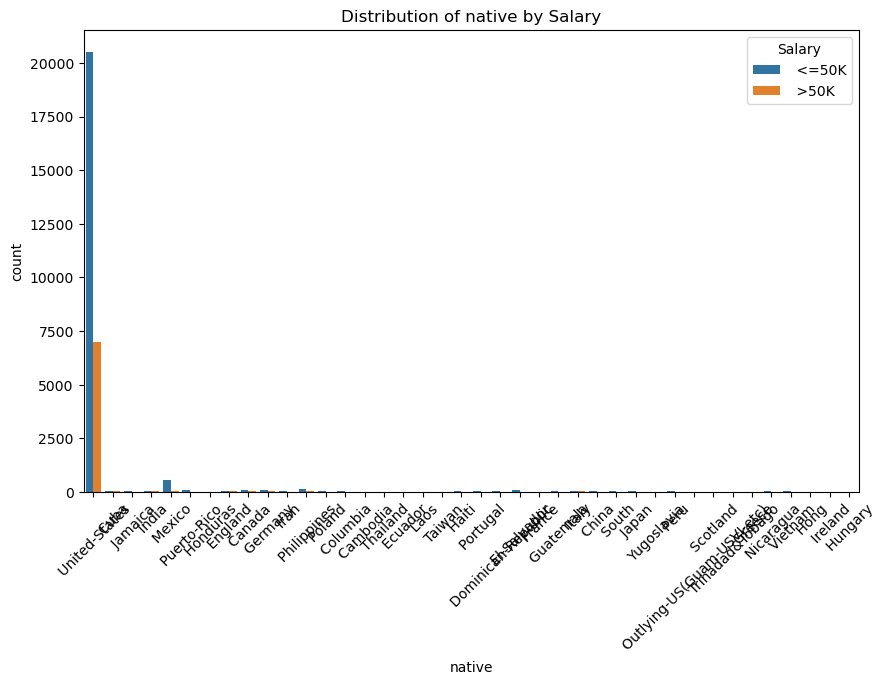

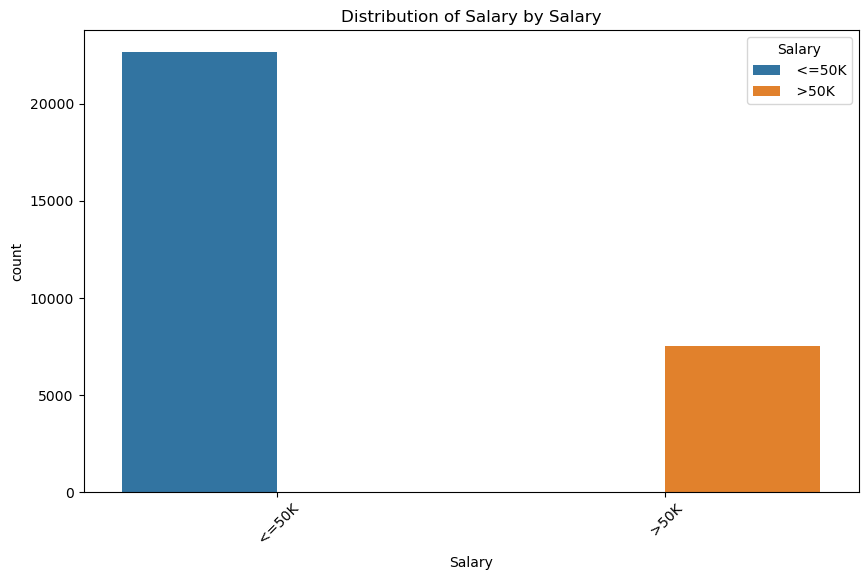

In [46]:
categorical_columns = df_Train.select_dtypes(include='object').columns
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, hue='Salary', data=df_Train)
    plt.title(f'Distribution of {column} by Salary')
    plt.xticks(rotation=45)
    plt.show()


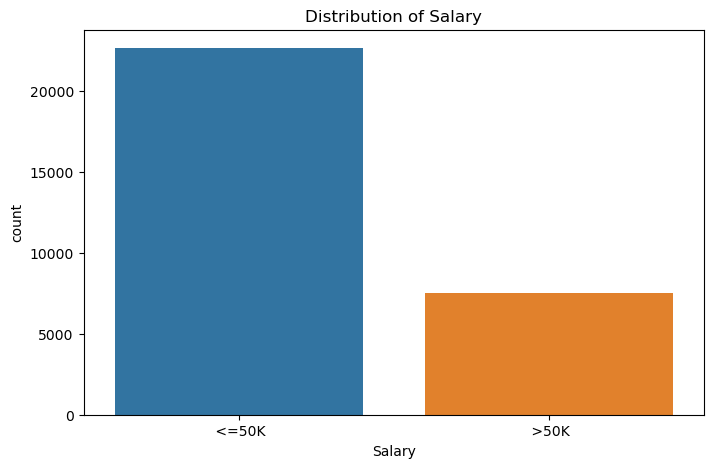

In [11]:
# Visualize the distribution of the target variable 'Salary'
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.countplot(x='Salary', data=df_Train)
plt.title('Distribution of Salary')
plt.show()

In [12]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder

In [13]:
df1_Test=pd.get_dummies(df_Test[0:])
df1_Train=pd.get_dummies(df_Train)

In [14]:
df1_Test

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia,Salary_ <=50K,Salary_ >50K
0,25,7,0,0,40,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,False
1,38,9,0,0,50,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,False
2,28,12,0,0,40,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,True
3,44,10,7688,0,40,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,True
4,34,6,0,0,30,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5405,30,10,0,0,50,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,False
5406,39,9,2202,0,45,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,False
5407,51,10,0,0,40,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
5408,31,9,0,0,40,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False


In [15]:
# Convert all boolean columns to 0 and 1 in the entire DataFrame
bool_columns = df1_Test.select_dtypes(include=bool).columns
df1_Test[bool_columns] = df1_Test[bool_columns].astype(int)

bool_columns = df1_Train.select_dtypes(include=bool).columns
df1_Train[bool_columns] = df1_Train[bool_columns].astype(int)


In [16]:
df1_Test.head()

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia,Salary_ <=50K,Salary_ >50K
0,25,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
1,38,9,0,0,50,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
2,28,12,0,0,40,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,44,10,7688,0,40,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
4,34,6,0,0,30,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0


In [17]:
df1_Train['Salary'] = df1_Train['Salary_ <=50K'].apply(lambda x: 0 if x == 1 else 1)


C:\Users\hp\AppData\Local\Temp\ipykernel_4372\3719134730.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1_Train['Salary'] = df1_Train['Salary_ <=50K'].apply(lambda x: 0 if x == 1 else 1)


In [18]:
df1_Train = df1_Train.drop(['Salary_ <=50K', 'Salary_ >50K'], axis=1)


In [19]:
df1_Train

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia,Salary
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,13,0,0,13,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,38,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,53,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,28,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,12,0,0,38,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
30157,40,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
30158,58,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
30159,22,9,0,0,20,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [20]:
##Normalising the data as there is scale difference
def norm_func(i):
    x= (i-i.min())/(i.max()-i.min())
    return (x)

In [21]:
Salary_data = norm_func(df1_Train)

In [22]:
Salary_data

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia,Salary
0,0.301370,0.800000,0.021740,0.0,0.397959,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.452055,0.800000,0.000000,0.0,0.122449,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.287671,0.533333,0.000000,0.0,0.397959,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.493151,0.400000,0.000000,0.0,0.397959,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.150685,0.800000,0.000000,0.0,0.397959,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,0.136986,0.733333,0.000000,0.0,0.377551,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
30157,0.315068,0.533333,0.000000,0.0,0.397959,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
30158,0.561644,0.533333,0.000000,0.0,0.397959,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
30159,0.068493,0.533333,0.000000,0.0,0.193878,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [23]:
x = df1_Train.drop(['Salary'], axis=1)
y = df1_Train['Salary']

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25)


In [25]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((22620, 102), (22620,), (7541, 102), (7541,))

In [26]:
model=SVC()
model.fit(x_train,y_train)

SVC()

In [27]:
pred=model.predict(x_test)

In [28]:
pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [29]:
print(confusion_matrix(pred,y_test))
print(classification_report(pred,y_test))

[[5454 1373]
 [ 184  530]]
              precision    recall  f1-score   support

           0       0.97      0.80      0.88      6827
           1       0.28      0.74      0.41       714

    accuracy                           0.79      7541
   macro avg       0.62      0.77      0.64      7541
weighted avg       0.90      0.79      0.83      7541



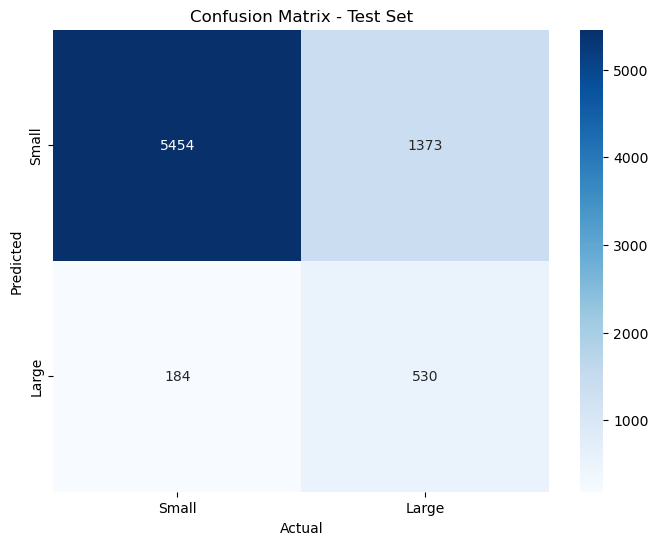

In [30]:
cm = confusion_matrix(pred, y_test)

# heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Small', 'Large'], yticklabels=['Small', 'Large'])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix - Test Set')
plt.show()

In [31]:
np.mean(pred==y_test)*100

79.35287097201963

In [32]:
model = SVC(kernel='rbf')

In [33]:
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf']}


In [34]:
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)

In [35]:
grid.fit(x_train, y_train)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.752 total time= 2.2min
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.752 total time= 2.0min
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.752 total time= 2.0min
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.752 total time= 2.0min
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.752 total time= 3.1min
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.769 total time= 1.6min
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.772 total time= 1.6min
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.770 total time= 1.7min
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.774 total time= 1.7min
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.773 total time= 1.6min
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.836 total time=  57.3s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=3)

In [37]:
cv_scores = cross_val_score(grid.best_estimator_, x_train, y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))


Cross-validation scores: [0.86494253 0.8627321  0.86693192 0.87356322 0.87046861]
Mean CV Score: 0.8677276746242264


In [41]:
# Assuming grid is your GridSearchCV object
best_svc = grid.best_estimator_

# Making predictions on the test set
pred_test = best_svc.predict(x_test)


In [44]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
print("Accuracy:", metrics.accuracy_score(y_test, pred_test))
print(confusion_matrix(y_test, pred_test))
print(classification_report(y_test, pred_test))

Accuracy: 0.8658002917384963
[[5333  305]
 [ 707 1196]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      5638
           1       0.80      0.63      0.70      1903

    accuracy                           0.87      7541
   macro avg       0.84      0.79      0.81      7541
weighted avg       0.86      0.87      0.86      7541



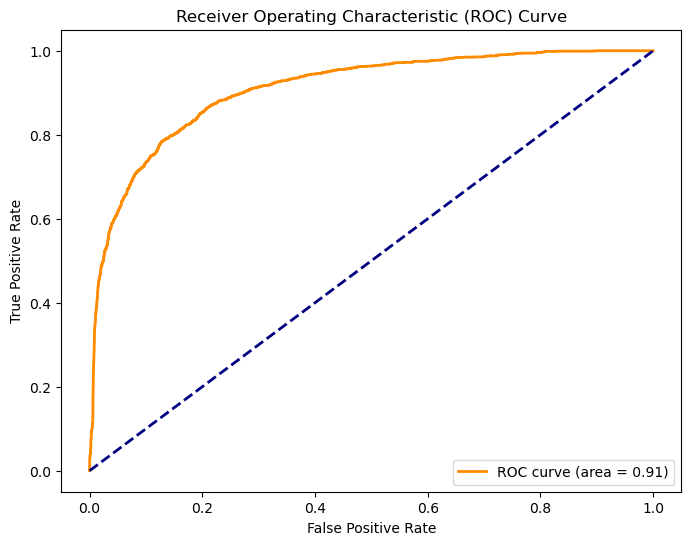

In [49]:
# Get predicted probabilities for the positive class
probs = best_svc.decision_function(x_test)

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


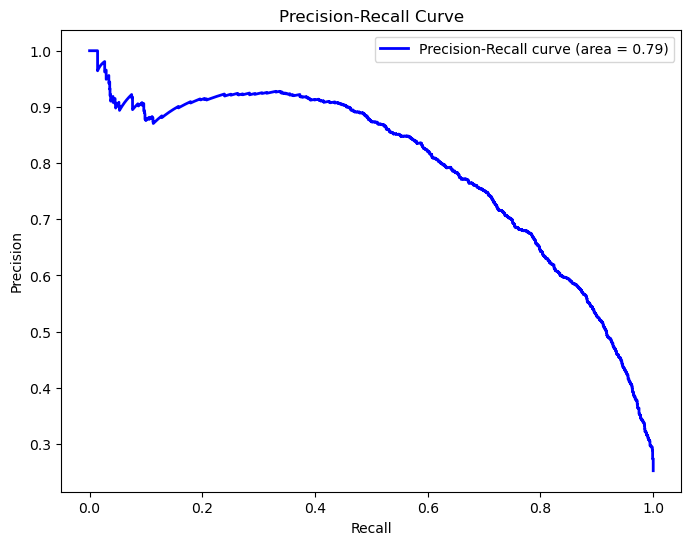

In [50]:
# Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, probs)
average_precision = average_precision_score(y_test, probs)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (area = {:.2f})'.format(average_precision))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()